#Correlation vs mode number

In [1]:
%pylab inline
sys.path.append('/home/photon/code/PylonCCD')
import Qfunction as Qfunc
import scipy.stats as sp

Populating the interactive namespace from numpy and matplotlib


In [11]:
cd "/home/photon/data/06-15-2015"

/home/photon/data/06-15-2015


In [12]:
ls

10-42-54_raw.npz  10-43-49_raw.npz


In [17]:
vac_file = np.load("10-42-54_raw.npz")
signal_file = np.load("10-43-49_raw.npz")
vac_data = vac_file['dataOut']
signal_data = signal_file['dataOut']
ncount = signal_file['ncount']
Kp_vac = np.average(vac_data,axis=(1,2))

#implement eqns (9) and (10) from PRA paper:
scaledVacuumCorrected = np.sqrt(2.0/ncount)*(signal_data - Kp_vac.reshape(600,1,1))

In [30]:
modeA = 204
output = scaledVacuumCorrected[modeA,:,:].flatten()  # Choose the mode to analyze
x = np.real(output)
y = np.imag(output)

modes = range(0,250)

Pearson_real = []
Pearson_imag = []
theta = []
photonNumber = []

for i in modes:
    RealPearson, p = sp.pearsonr(np.real(scaledVacuumCorrected[i].flatten()), x)
    ImagPearson, p = sp.pearsonr(np.imag(scaledVacuumCorrected[i].flatten()), y)
    Pearson_real.append(RealPearson)
    Pearson_imag.append(ImagPearson)
    theta.append(modes[i] * (780e-9*1000)/(600*20e-6))
    photonNumber.append(0.5*(np.average(np.abs(scaledVacuumCorrected[i])))**2)
    

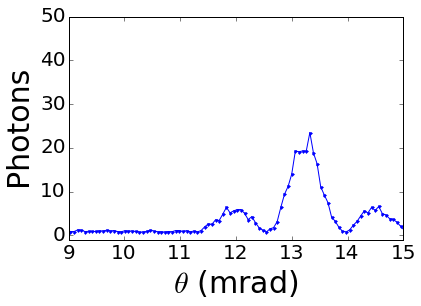

In [31]:
plot(theta[10:300], photonNumber[10:300] ,".-")
xlabel("$\\theta$ (mrad)",fontsize=30)
ylabel("Photons",fontsize=30)
xlim((9,15))
ylim((-1,50))
tick_params(labelsize=20)

[9, 15, -1.1, 1.1]

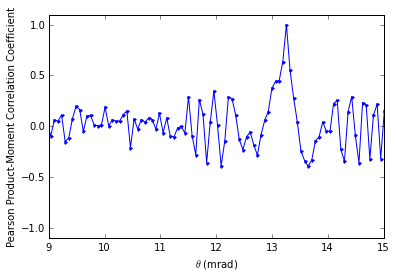

In [22]:
plot(theta,Pearson_real,".-")
#plot(theta,Pearson_imagF,".-")
xlabel("$\\theta$ (mrad)")
ylabel("Pearson Product-Moment Correlation Coefficient")
axis([9,15,-1.1,1.1])

[9, 15, -1.1, 1.1]

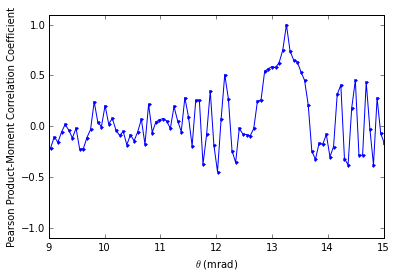

In [33]:
plot(theta,Pearson_imag,".-")
#plot(theta,Pearson_imagF,".-")
xlabel("$\\theta$ (mrad)")
ylabel("Pearson Product-Moment Correlation Coefficient")
axis([9,15,-1.1,1.1])